In [1]:
pip install h3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00


In [2]:
pip install shapely

In [3]:
pip install geopy

In [4]:
pip install geopandas

In [5]:
pip install folium

In [6]:
pip install pandas

In [7]:
import h3
import h3.api.basic_int as h3_int  # int와 list/set 출력
import h3.api.numpy_int as h3_np  # uint64와 ndarray 출력
import h3.api.memview_int as h3_mv  # uint64와 memoryview(collections) 출력

from shapely.geometry import Point, Polygon
from geopy.distance import distance
import geopandas as gpd
import folium
import pandas as pd
# gpd.__version__

'''
GeoDataFrame 자료형은 pandas의 DataFrame 자료형처럼 다룰 수 있음!!!

이제 소상공인시장진흥공단_상가(상권)정보_서울.csv 파일을 geopandas로 불러와보자
'''

# pandas로 csv 파일 불러오기
seoul_shop = pd.read_csv('/content/drive/MyDrive/오늘은 내가 탕후루 요리사/seoul_shop.csv', sep=',')
type(seoul_shop)  # pandas.core.frame.DataFrame
# GeoDataFrame 형식으로 변환
seoul_shop = gpd.GeoDataFrame(seoul_shop, geometry=gpd.points_from_xy(seoul_shop['경도'], seoul_shop['위도']))
type(seoul_shop)  # geopandas.geodataframe.GeoDataFrame
seoul_shop.head()
seoul_shop.set_crs(epsg=4326, inplace=True)

<ipython-input-7-1f1177af8c54>:20: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  seoul_shop = pd.read_csv('/content/drive/MyDrive/오늘은 내가 탕후루 요리사/seoul_shop.csv', sep=',')


,"""상가업소번호""",상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,geometry
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503,POINT (127.08283 37.56850)
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708,POINT (127.00585 37.56571)
2,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226,POINT (127.07696 37.64923)
3,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117,POINT (126.82883 37.54212)
4,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053,POINT (126.83302 37.56005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473757,MA0101202303A0082673,놀아보자,NaN,M1,과학·기술,M107,본사·경영 컨설팅,M10703,경영 컨설팅업,M71531,...,NaN,서울특별시 강남구 압구정로46길 71-1,135896,6020,NaN,NaN,NaN,127.036800,37.524093,POINT (127.03680 37.52409)
473758,MA0101202303A0010399,멕시칸라이브그릴,송파점,I2,음식,I204,서양식,I20401,경양식,I56123,...,문정래미안아파트,서울특별시 송파구 문정로 83,138764,5794,NaN,1,NaN,127.130211,37.489199,POINT (127.13021 37.48920)
473759,MA0101202303A0018222,이프모텔,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,NaN,서울특별시 강동구 양재대로109길 11,134814,5353,NaN,NaN,NaN,127.138616,37.536143,POINT (127.13862 37.53614)
473760,MA0101202303A0039667,강남고양이분양냥블리,NaN,G2,소매,G220,애완동물·용품 소매,G22001,애완동물/애완용품 소매업,G47852,...,NaN,서울특별시 강남구 압구정로14길 39,135890,6029,NaN,2,NaN,127.023582,37.521804,POINT (127.02358 37.52180)


In [8]:
# source: https://github.com/uber/h3-py-notebooks/blob/master/notebooks/usage.ipynb
def visualize_hexagons(hexagons, color="purple", folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons.
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)

    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='OpenStreetMap')
        '''
        타일 종류
            OpenStreetMap (기본값)
            Stamen Terrain, Stamen Toner, Stamen Watercolor
            CartoDB positron, CartoDB dark_matter
        '''
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
        m.add_child(my_PolyLine)
    return m


def visualize_polygon(polyline, color):
    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='OpenStreetMap')
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
    m.add_child(my_PolyLine)
    return m

In [9]:
'''
서울 중심부 위경도
Latitude: 37.566295
Longitude: 126.977945
'''
seoul_center_latlng = [37.566295, 126.977945]
seoul_center_h3 = h3.geo_to_h3(seoul_center_latlng[0], seoul_center_latlng[1], 9)  # latitude, longtitude, hex resolution
seoul_center_loc = h3.h3_to_geo(seoul_center_h3)

print('서울 원래 좌표  :', seoul_center_latlng)
print('서울 H3 중심좌표:', seoul_center_loc)
print('서울 H3       :', seoul_center_h3)


# 인접 neighbors 그리드 모두 뽑기

seoul_neighbor_grids = h3.k_ring(seoul_center_h3, 70)  # center grid, ring_size(distance)
display(seoul_neighbor_grids)
# print(type(seoul_neighbor_grids))

서울 원래 좌표  : [37.566295, 126.977945]
서울 H3 중심좌표: (37.566368138664124, 126.97894216577954)
서울 H3       : 8930e1d8c0bffff


{'8930e1d9c87ffff',
 '8930e036067ffff',
 '8930e1c052bffff',
 '8930e1db1c3ffff',
 '8930e0acdabffff',
 '8930e1d565bffff',
 '8930e1c8acbffff',
 '8930e1c91a7ffff',
 '8930e0a5b83ffff',
 '8930e1c3437ffff',
 '8930e1db383ffff',
 '8930e1d16afffff',
 '8930e1c9d67ffff',
 '8930e1c9303ffff',
 '8930e1da207ffff',
 '8930e1da36bffff',
 '8930e1c86b3ffff',
 '8930e1d83c3ffff',
 '8930e0a4907ffff',
 '8930e0a502bffff',
 '8930e036b43ffff',
 '8930e1c8c87ffff',
 '8930e1c214fffff',
 '8930e1c220bffff',
 '8930e1c0993ffff',
 '8930e03435bffff',
 '8930e0adb77ffff',
 '8930e034dd7ffff',
 '8930e1d8237ffff',
 '8930e1c1177ffff',
 '8930e1ca6a3ffff',
 '8930e0acc5bffff',
 '8930e1ca897ffff',
 '8930e1c305bffff',
 '8930e1d2e8bffff',
 '8930e1c292fffff',
 '8930e1db6b7ffff',
 '8930e15241bffff',
 '8930e1c8c4fffff',
 '8930e1c0a4bffff',
 '8930e1d290fffff',
 '8930e1d8037ffff',
 '8930e0ace3bffff',
 '8930e1c205bffff',
 '8930e0340b7ffff',
 '8930e1da493ffff',
 '8930e0a483bffff',
 '8930e1d8403ffff',
 '8930e1d0653ffff',
 '8930e0ae913ffff',


In [10]:
neighbors_list = list(seoul_neighbor_grids)
print(type(neighbors_list))
print(neighbors_list[:5])

<class 'list'>
['8930e1d9c87ffff', '8930e036067ffff', '8930e1c052bffff', '8930e1db1c3ffff', '8930e0acdabffff']


In [11]:
m = visualize_hexagons(neighbors_list)

In [12]:
display(m)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
def to_polygon(l):
    return Polygon(h3.h3_to_geo_boundary(l, geo_json=True))

In [14]:
seoul_file_2 = "/content/drive/MyDrive/오늘은 내가 탕후루 요리사/LARD_ADM_SECT_SGG_11.shp"  # 지도파일 저장된 경로 변수
seoul_2 = gpd.read_file(seoul_file_2, encoding='euckr')
seoul_2.tail(5)

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
20,11215,광진구,NaN,11215,145,"POLYGON ((964825.058 1952633.250, 964875.565 1..."
21,11200,성동구,NaN,11200,146,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
22,11170,용산구,NaN,11170,147,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
23,11140,중구,NaN,11140,148,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
24,11110,종로구,NaN,11110,149,"POLYGON ((956615.453 1953567.199, 956621.579 1..."


In [15]:
'''
25개 서울 내 구별 이름들 리스트화 및 각 구별로 경계선 폴리곤 객체 따로 저장
'''
# print(len(seoul_2))
seoul_gu_names = seoul_2['SGG_NM'].values.tolist()


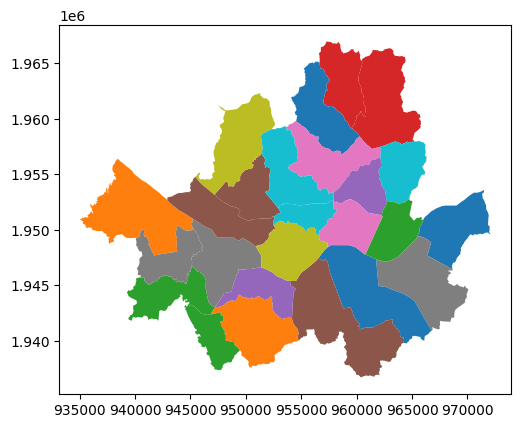

In [16]:
seoul_boundary_gpd = gpd.GeoDataFrame.from_file(seoul_file_2)
ax = seoul_boundary_gpd.plot(column='SGG_NM')
# plt.show()

In [17]:
from pprint import pprint

# pprint(seoul_boundary_2)
# print(type(seoul_boundary_2))
pprint(seoul_boundary_gpd.info)
pprint(seoul_boundary_gpd.shape)

<bound method DataFrame.info of    ADM_SECT_C    SGG_NM  SGG_OID COL_ADM_SE  GID  \
0       11740    °­µ¿±¸      NaN      11740  125   
1       11710    ¼ÛÆÄ±¸      NaN      11710  126   
2       11680    °­³²±¸      NaN      11680  127   
3       11650    ¼­ÃÊ±¸      NaN      11650  128   
4       11620    °ü¾Ç±¸      NaN      11620  129   
5       11590    µ¿ÀÛ±¸      NaN      11590  130   
6       11560  ¿µµîÆ÷±¸      NaN      11560  131   
7       11545    ±ÝÃµ±¸      NaN      11545  132   
8       11530    ±¸·Î±¸      NaN      11530  133   
9       11500    °­¼­±¸      NaN      11500  134   
10      11470    ¾çÃµ±¸      NaN      11470  135   
11      11440    ¸¶Æ÷±¸      NaN      11440  136   
12      11410  ¼­´ë¹®±¸      NaN      11410  137   
13      11380    ÀºÆò±¸      NaN      11380  138   
14      11350    ³ë¿ø±¸      NaN      11350  139   
15      11320    µµºÀ±¸      NaN      11320  140   
16      11305    °­ºÏ±¸      NaN      11305  141   
17      11290    ¼ººÏ±¸      NaN

In [18]:
'''
위경도 변환 코드 정상동작 여부 체크하기 위한 코드셀
'''

import pyproj

# Define the EPSG codes for the source (5179) and target (4326) coordinate systems
source_epsg = 'EPSG:5179'
target_epsg = 'EPSG:4326'

# Create a Pyproj transformer
transformer = pyproj.Transformer.from_crs(source_epsg, target_epsg, always_xy=True)

# Define the input coordinates in EPSG 5179
x = 971595.075463049
y = 1952405.81486326

# Perform the coordinate transformation
lon, lat = transformer.transform(x, y)

# Print the converted coordinates in EPSG 4326
print(f"Latitude (EPSG 4326): {lat}")
print(f"Longitude (EPSG 4326): {lon}")

Latitude (EPSG 4326): 37.57058448602296
Longitude (EPSG 4326): 127.17833865259387


In [19]:
import pyproj
from shapely.geometry import Polygon, Point, mapping
from pprint import pprint

# Define the EPSG codes for the source (5179) and target (4326) coordinate systems
source_epsg = 'EPSG:5179'
target_epsg = 'EPSG:4326'

# Create a Pyproj transformer
transformer = pyproj.Transformer.from_crs(source_epsg, target_epsg, always_xy=True)

seoul_shp = seoul_boundary_gpd
'''
seoul_boundary_gpd의 geometry에는 25개의 구들에 대한 폴리곤 객체가 각각 담겨있다. (서울 플롯한 상기 코드셀 참고,,,)
'''

# print(seoul_shp)

res = 11
geo_3 = mapping(seoul_shp["geometry"].iloc[0])
# print(type(geo_3))
pprint(geo_3)

##########################################
# Perform the coordinate transformation
lon, lat = transformer.transform(geo_3['coordinates'][0][0][0], geo_3['coordinates'][0][0][1])

print(f"Latitude (EPSG 5179): {geo_3['coordinates'][0][0][1]}")
print(f"Longitude (EPSG 5179): {geo_3['coordinates'][0][0][0]}")

# Print the converted coordinates in EPSG 4326
print(f"Latitude (EPSG 4326): {lat}")
print(f"Longitude (EPSG 4326): {lon}")
##########################################

geo_3['coordinates'] = [[[j[0], j[1]] for j in i] for i in geo_3['coordinates']]
for i in geo_3['coordinates']:
  for j in i:
    # print(j)
    # print(transformer.transform(j[0], j[1]))
    j[0], j[1] = transformer.transform(j[0], j[1])

# geo_3['coordinates'] = tuple([tuple([tuple([j[1],j[0]]) for j in i]) for i in geo_3['coordinates']])  # x, y 좌표 순서를 y, x 순서로 변환
# geo_3['coordinates'] = [[[j[1],j[0]] for j in i] for i in geo_3['coordinates']]  # x, y 좌표 순서를 y, x 순서로 변환
# pprint(geo_3)
# print(type(geo_3))

# hex_list = h3.polyfill(geo,res)   #  doesn't work as I thought,,, returns empty list for some reason,,,
# hex_list = h3.polyfill(geo,res, geo_json_conformant=True)
hex_list_3 = h3.polyfill_geojson(geo_3,res)

print("*Resolution :", res)
print("*Number of hex :", len(hex_list_3))

{'coordinates': (((971595.075463049, 1952405.81486326),
                  (971596.035607428, 1952398.37464981),
                  (971597.160140266, 1952398.36868445),
                  (971598.942066565, 1952386.80170845),
                  (971600.137690549, 1952382.48403593),
                  (971602.162379426, 1952375.60095744),
                  (971604.079608921, 1952369.00033984),
                  (971606.67211838, 1952360.05204807),
                  (971608.987883144, 1952352.07384921),
                  (971609.339615528, 1952350.54157618),
                  (971610.416752597, 1952347.6309875),
                  (971615.216571422, 1952336.64077319),
                  (971616.080603104, 1952334.6369642),
                  (971617.052099529, 1952332.35169394),
                  (971622.514023348, 1952319.73359677),
                  (971622.614945995, 1952315.20381588),
                  (971624.767983847, 1952311.78771361),
                  (971630.315083062, 1952303.354543

In [20]:
from fiona.crs import from_string
import matplotlib.pyplot as plt
epsg4326 = from_string('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')

seoul_hex = pd.DataFrame(hex_list_3, columns=['hex_id'])
seoul_hex['geometry'] = seoul_hex['hex_id'].apply(lambda x: to_polygon(x))
seoul_hex = gpd.GeoDataFrame(seoul_hex, geometry='geometry', crs=epsg4326)
print(seoul_hex['geometry'])

0        POLYGON ((127.12581 37.54944, 127.12571 37.549...
1        POLYGON ((127.12732 37.55395, 127.12721 37.554...
2        POLYGON ((127.13343 37.55522, 127.13333 37.555...
3        POLYGON ((127.14012 37.52785, 127.14001 37.528...
4        POLYGON ((127.13158 37.54668, 127.13148 37.546...
                               ...                        
16515    POLYGON ((127.14907 37.52713, 127.14896 37.527...
16516    POLYGON ((127.15479 37.54151, 127.15469 37.541...
16517    POLYGON ((127.12074 37.55600, 127.12063 37.556...
16518    POLYGON ((127.14181 37.54335, 127.14170 37.543...
16519    POLYGON ((127.15089 37.56180, 127.15078 37.562...
Name: geometry, Length: 16520, dtype: geometry


In [21]:
'''
seoul_hex = pd.DataFrame(hex_list_3,columns=["hex_id"])
seoul_hex['geometry'] = seoul_hex["hex_id"].apply(lambda x : to_polygon(x))
seoul_hex = gpd.GeoDataFrame(seoul_hex, geometry='geometry', crs=epsg4326)

ax = seoul_hex.plot()
# seoul_shp_3.boundary.plot(ax=ax, color='black')
plt.show()
'''

'\nseoul_hex = pd.DataFrame(hex_list_3,columns=["hex_id"])\nseoul_hex[\'geometry\'] = seoul_hex["hex_id"].apply(lambda x : to_polygon(x))\nseoul_hex = gpd.GeoDataFrame(seoul_hex, geometry=\'geometry\', crs=epsg4326)\n\nax = seoul_hex.plot()\n# seoul_shp_3.boundary.plot(ax=ax, color=\'black\')\nplt.show()\n'

# 연습 끝 이제 실제로 좌표값 뽑자

In [22]:
import pyproj
from shapely.geometry import Polygon, Point, mapping
from pprint import pprint

# Define the EPSG codes for the source (5179) and target (4326) coordinate systems
source_epsg = 'EPSG:5179'
target_epsg = 'EPSG:4326'

# Create a Pyproj transformer
transformer = pyproj.Transformer.from_crs(source_epsg, target_epsg, always_xy=True)

seoul_shp = seoul_boundary_gpd
'''
seoul_boundary_gpd의 geometry에는 25개의 구들에 대한 폴리곤 객체가 각각 담겨있다. (서울 플롯한 상기 코드셀 참고,,,)
'''


# 폴리곤 해상도 설정
res = 11

# 각 구별 따로 생성된 geo 객체 담을 리스트
all_geos = []

# 각 구별로 geo 객체 생성
for i in range(25):
  geo = mapping(seoul_shp["geometry"].iloc[i])
  all_geos.append(geo)

# pprint(all_geos[len(all_geos)-1])
# pprint(all_geos[0])
# print(len(all_geos))

In [23]:
for geo in all_geos:
  geo['coordinates'] = [[[j[0], j[1]] for j in i] for i in geo['coordinates']]  # EPSG 5179 -> EPSG 4326 변환 위해 tuple -> list 변환
  for i in geo['coordinates']:
    for j in i:
      j[0], j[1] = transformer.transform(j[0], j[1])  # EPSG 5179 -> EPSG 4326 변환

# pprint(all_geos[len(all_geos)-1])

In [24]:
'''
EPSG 4326 projection으로 변환된 위경도 좌표계를 이용해 h3 hex grid 중심 좌표값 뽑기
'''

# 서울 내 각 구별로 그리드들을 저장할 2중 리스트 선언
all_hex_lists = []

# 각 구별로 그리드들을 저장
for geo in all_geos:
  all_hex_lists.append(h3.polyfill_geojson(geo, res))

In [25]:
'''
각 구별 그리드 잘 저장됐는지 확인
'''
print("*Resolution :", res)
for hex_list in all_hex_lists:
  print("*Number of hex :", len(hex_list))
print(len(all_hex_lists))

*Resolution : 11
*Number of hex : 16520
*Number of hex : 22778
*Number of hex : 26644
*Number of hex : 31634
*Number of hex : 20026
*Number of hex : 11077
*Number of hex : 16605
*Number of hex : 8817
*Number of hex : 13622
*Number of hex : 28116
*Number of hex : 11803
*Number of hex : 16158
*Number of hex : 11967
*Number of hex : 20146
*Number of hex : 23990
*Number of hex : 13942
*Number of hex : 15945
*Number of hex : 16601
*Number of hex : 12489
*Number of hex : 9602
*Number of hex : 11478
*Number of hex : 11338
*Number of hex : 14803
*Number of hex : 6731
*Number of hex : 16200
25


In [26]:
'''
서울시 모든 구들을 합친 전체 서울 그리드 저장
'''
hex_cnt = 0

seoul_hex_list = []  # 서울 전체 h3 그리드 모두 담을 리스트 선언
for hex_list in all_hex_lists:
  for elem in hex_list:
    seoul_hex_list.append(elem)
    hex_cnt += 1

assert len(seoul_hex_list) == hex_cnt
assert len(seoul_hex_list) == len(list(set(seoul_hex_list)))  # 중복 없는지 체크

In [27]:
print(seoul_hex_list[0])  # h3 좌표값으로 저장된 것을 확인할 수 있다.

8b30e1c1b0f4fff


0         POLYGON ((127.12581 37.54944, 127.12571 37.549...
1         POLYGON ((127.12732 37.55395, 127.12721 37.554...
2         POLYGON ((127.13343 37.55522, 127.13333 37.555...
3         POLYGON ((127.14012 37.52785, 127.14001 37.528...
4         POLYGON ((127.13158 37.54668, 127.13148 37.546...
                                ...                        
409027    POLYGON ((126.95887 37.60146, 126.95876 37.601...
409028    POLYGON ((126.98337 37.58986, 126.98327 37.590...
409029    POLYGON ((126.96937 37.56980, 126.96926 37.570...
409030    POLYGON ((126.96878 37.59452, 126.96867 37.594...
409031    POLYGON ((127.00072 37.57772, 127.00061 37.577...
Name: geometry, Length: 409032, dtype: geometry


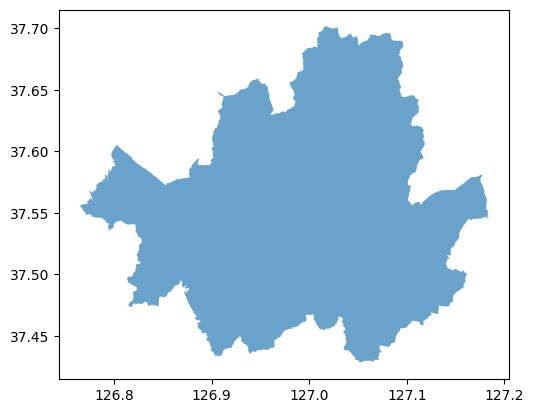

In [28]:
'''
시각화하기
'''
from fiona.crs import from_string
import matplotlib.pyplot as plt
epsg4326 = from_string('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')


def to_polygon(l):
    return Polygon(h3.h3_to_geo_boundary(l, geo_json=True))


# 서울 전체의 그리드들로 이뤄진 판다스 데이터프레임 생성
seoul_hex = pd.DataFrame(seoul_hex_list, columns=['hex_id'])
# 각 헥사곤 그리드를 폴리곤화하기
seoul_hex['geometry'] = seoul_hex['hex_id'].apply(lambda x: to_polygon(x))
# 지오판다스 지오데이터프레임화, EPSG 4326(WGS84) 기준으로
seoul_hex = gpd.GeoDataFrame(seoul_hex, geometry='geometry', crs=epsg4326)
print(seoul_hex['geometry'])

ax = seoul_hex.plot()
# seoul_shp_3.boundary.plot(ax=ax, color='black')
plt.show()

In [29]:
'''
그리드 중심점의 좌표변환한(h3 -> epsg4326) 리스트 생성
'''

# 서울 전체 그리드들의 좌표값 전부 담을 리스트 선언
seoul_all_coordinates = []
# 서울 전체 구별로 그리드들의 좌표값을 담은 리스트들이 이중으로 담길 2-d list 선언
seoul_gu_coordinates = []


# 서울 전체 그리드들의 좌표값 전부 변환 (h3 -> epsg4326)
for h3_coordinate in seoul_hex_list:
  seoul_all_coordinates.append(h3.h3_to_geo(h3_coordinate))
assert len(seoul_all_coordinates) == len(seoul_hex_list)  # h3 -> epsg4326 변환 전후 개수변화 없는지 체크
assert len(seoul_all_coordinates) == len(list(set(seoul_all_coordinates)))  # 중복요소 있는지 체크

# 서울 전체 구별로 그리드들의 좌표값 전부 변환 (h3 -> epsg4326)
for hex_list in all_hex_lists:
  gu_coordinate = []
  for h3_coordinate in hex_list:
    gu_coordinate.append(h3.h3_to_geo(h3_coordinate))
  assert len(gu_coordinate) == len(hex_list)  # 서울시 내 각 구별 그리드의 좌표변환(h3 -> epsg4326) 전후 개수변화 없는지 체크
  seoul_gu_coordinates.append(gu_coordinate)
assert len(seoul_gu_coordinates) == 25  # 25개 구 전부에 대해 변환 및 저장됐는지 체크
cnt_coordinates = 0
for gu_list in seoul_gu_coordinates:
  cnt_coordinates += len(list(set(gu_list)))
assert cnt_coordinates == len(seoul_all_coordinates)

In [30]:
# pprint(seoul_all_coordinates)

In [31]:
# pprint(seoul_gu_coordinates[0])

In [32]:
'''
시각화 함수
'''
from fiona.crs import from_string
import matplotlib.pyplot as plt
epsg4326 = from_string('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')
def to_polygon(l):
    return Polygon(h3.h3_to_geo_boundary(l, geo_json=True))

def poly_plot(list_of_hex):
  # 서울 전체의 그리드들로 이뤄진 판다스 데이터프레임 생성
  seoul_hex = pd.DataFrame(list_of_hex, columns=['hex_id'])
  # 각 헥사곤 그리드를 폴리곤화하기
  seoul_hex['geometry'] = seoul_hex['hex_id'].apply(lambda x: to_polygon(x))
  # 지오판다스 지오데이터프레임화, EPSG 4326(WGS84) 기준으로
  seoul_hex = gpd.GeoDataFrame(seoul_hex, geometry='geometry', crs=epsg4326)
  # print(seoul_hex['geometry'])

  ax = seoul_hex.plot()
  # seoul_shp_3.boundary.plot(ax=ax, color='black')
  plt.show()

In [33]:
'''
변환 함수
'''

import pyproj
from shapely.geometry import Polygon, Point, mapping
from pprint import pprint


# Define the EPSG codes for the source (5179) and target (4326) coordinate systems
source_epsg = 'EPSG:5179'
target_epsg = 'EPSG:4326'

# seoul_boundary_gpd의 geometry에는 25개의 구들에 대한 폴리곤 객체가 각각 담겨있다. (서울 플롯한 상기 코드셀 참고,,,)
seoul_shp = seoul_boundary_gpd

'''
param:
  seoul_shp, source_epsg, target_epsg, res
'''
def grid_coordinates(shp_gpd_file, source_epsg, target_epsg, resolution, plot=False, assertion=True):
  # Create a Pyproj transformer
  transformer = pyproj.Transformer.from_crs(source_epsg, target_epsg, always_xy=True)

  # set polygon resolution
  res = resolution

  # 각 구별 따로 생성된 geo 객체 담을 리스트
  all_geos = []

  # 각 구별로 geo 객체 생성
  for i in range(25):
    geo = mapping(seoul_shp["geometry"].iloc[i])
    all_geos.append(geo)

  for geo in all_geos:
    geo['coordinates'] = [[[j[0], j[1]] for j in i] for i in geo['coordinates']]  # EPSG 5179 -> EPSG 4326 변환 위해 tuple -> list 변환
    for i in geo['coordinates']:
      for j in i:
        j[0], j[1] = transformer.transform(j[0], j[1])  # EPSG 5179 -> EPSG 4326 변환

  '''
  EPSG 4326 projection으로 변환된 위경도 좌표계를 이용해 h3 hex grid 중심 좌표값 뽑기
  '''

  # 서울 내 각 구별로 그리드들을 저장할 2중 리스트 선언
  all_hex_lists = []

  # 각 구별로 그리드들을 저장
  for geo in all_geos:
    all_hex_lists.append(h3.polyfill_geojson(geo, res))

  '''
  서울시 모든 구들을 합친 전체 서울 그리드 저장
  '''
  hex_cnt = 0

  seoul_hex_list = []  # 서울 전체 h3 그리드 모두 담을 리스트 선언
  for hex_list in all_hex_lists:
    for elem in hex_list:
      seoul_hex_list.append(elem)
      hex_cnt += 1

  if assertion is True:
    assert len(seoul_hex_list) == hex_cnt
    assert len(seoul_hex_list) == len(list(set(seoul_hex_list)))  # 중복 없는지 체크
  if plot is True:
    poly_plot(seoul_hex_list)

  '''
  그리드 중심점의 좌표변환한(h3 -> epsg4326) 리스트 생성
  '''
  # 서울 전체 그리드들의 좌표값 전부 담을 리스트 선언
  seoul_all_coordinates = []
  # 서울 전체 구별로 그리드들의 좌표값을 담은 리스트들이 이중으로 담길 2-d list 선언
  seoul_gu_coordinates = []


  # 서울 전체 그리드들의 좌표값 전부 변환 (h3 -> epsg4326)
  for h3_coordinate in seoul_hex_list:
    seoul_all_coordinates.append(h3.h3_to_geo(h3_coordinate))
  if assertion is True:
    assert len(seoul_all_coordinates) == len(seoul_hex_list)  # h3 -> epsg4326 변환 전후 개수변화 없는지 체크
    assert len(seoul_all_coordinates) == len(list(set(seoul_all_coordinates)))  # 중복요소 있는지 체크

  # 서울 전체 구별로 그리드들의 좌표값 전부 변환 (h3 -> epsg4326)
  for hex_list in all_hex_lists:
    if plot is True:
      poly_plot(hex_list)
    gu_coordinate = []
    for h3_coordinate in hex_list:
      gu_coordinate.append(h3.h3_to_geo(h3_coordinate))
    if assertion is True:
      assert len(gu_coordinate) == len(hex_list)  # 서울시 내 각 구별 그리드의 좌표변환(h3 -> epsg4326) 전후 개수변화 없는지 체크
    seoul_gu_coordinates.append(gu_coordinate)
  if assertion is True:
    assert len(seoul_gu_coordinates) == 25  # 25개 구 전부에 대해 변환 및 저장됐는지 체크
  cnt_coordinates = 0
  for gu_list in seoul_gu_coordinates:
    cnt_coordinates += len(list(set(gu_list)))
  if assertion is True:
    assert cnt_coordinates == len(seoul_all_coordinates)

  return seoul_all_coordinates, seoul_gu_coordinates

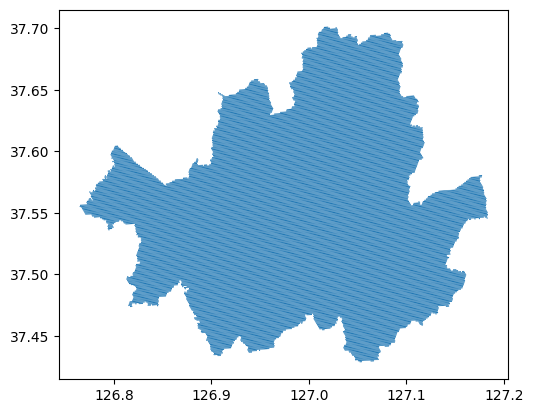

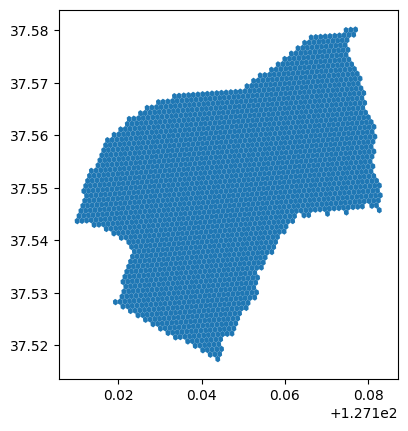

KeyboardInterrupt: ignored

In [41]:
import pyproj
from shapely.geometry import Polygon, Point, mapping
from pprint import pprint


# Define the EPSG codes for the source (5179) and target (4326) coordinate systems
source_epsg = 'EPSG:5179'
target_epsg = 'EPSG:4326'

# seoul_boundary_gpd의 geometry에는 25개의 구들에 대한 폴리곤 객체가 각각 담겨있다. (서울 플롯한 상기 코드셀 참고,,,)
seoul_shp = seoul_boundary_gpd

seoul_all_res8, seoul_gu_res8 = grid_coordinates(shp_gpd_file=seoul_shp,
                                                 source_epsg=source_epsg,
                                                 target_epsg=target_epsg,
                                                 resolution=10,
                                                 plot=True)

'''
pprint(seoul_all_res8[-5:])
print(len(seoul_all_res8))
pprint(seoul_gu_res8[0][-5:])
print(len(seoul_gu_res8))
pprint(seoul_gu_res8)
'''

In [35]:
# 각 resolution값 별로 그리드 좌표값 추출해 저장할 리스트 선언
coordinates_by_res = {}

# for res in range(5, 15):
for res in range(7, 14):  # 15스케일은 램 부족으로 커널 죽어서 포기...
  seoul_all, seoul_gu = grid_coordinates(shp_gpd_file=seoul_shp,
                                          source_epsg=source_epsg,
                                          target_epsg=target_epsg,
                                          resolution=res,
                                          plot=False,
                                          assertion=False
                                         )
  dict_new = {}
  dict_new["seoul_all"] = seoul_all
  dict_new["seoul_gu"] = seoul_gu
  coordinates_by_res[res] = dict_new
  print(f'scale{res} conversion done')

pprint(coordinates_by_res[7]['seoul_all'])

scale7 conversion done
scale8 conversion done
scale9 conversion done


KeyboardInterrupt: ignored

In [ ]:
# 각 resolution값 별로 생성한 DataFrame 저장할 딕셔너리
df_by_res = {}

for res in range(7, 14):
  lat_lng_dict = {}
  lat_list = []
  lng_list = []
  for elem in coordinates_by_res[res]['seoul_all']:
    lat_list.append(elem[0])
    lng_list.append(elem[1])
  lat_lng_dict['latitude'] = lat_list
  lat_lng_dict['longitude'] = lng_list
  # df_by_res[res] = lat_lng_dict
  df_by_res[res] = pd.DataFrame(lat_lng_dict)

pprint(df_by_res[7])
print(df_by_res[13].shape)

In [ ]:
'''
export to .csv
'''

# file export directory
file_export_dir = '/content/drive/MyDrive/오늘은 내가 탕후루 요리사/'

for res in range(7, 14):
  df_by_res[res].to_csv(file_export_dir + f'res{res}_coordinates.csv')
  print(f'scale{res} export complete')

In [ ]:
'''
구별로도 저장,,,
seoul_gu_names -> 25개 구 이름 순서대로 담긴 리스트,,, 인덱싱에 활용
'''

pprint(coordinates_by_res[7]['seoul_gu'])

In [ ]:
# 각 resolution값 별로 생성한 DataFrame 저장할 딕셔너리
df_gu_by_res = {}
'''
{
  7: {
    '강동구': {
      'latitude': [
        37.234324,
        :
        :
      ],
      'longitude': [
        126.398933,
        :
        :
      ]
    }
  },
  8: {
    :
    :
    :
  },
  :
  :
}
'''

for res in range(7, 14):
  res_gu_dict = {}  # 해당 resolution값에 대해 구별로 변환된 좌표를 담은 딕셔너리 -> df_gu_by_res에 append할 것

  # for gu_list in coordinates_by_res[res]['seoul_gu']:  # gu_list: resolution값에 따라 구분된 구별 좌표리스트
  for i in range(25):  # 총 25개 구들에 대해 반복 실행
    gu_list = coordinates_by_res[res]['seoul_gu'][i]  # gu_list: resolution값에 따라 구분된 구별 좌표리스트
    lat_lng_dict = {}
    lat_list = []
    lng_list = []
    for elem in gu_list:
      lat_list.append(elem[0])
      lng_list.append(elem[1])
    lat_lng_dict['latitude'] = lat_list
    lat_lng_dict['longitude'] = lng_list
  # df_by_res[res] = lat_lng_dict
    res_gu_dict[seoul_gu_names[i]] = pd.DataFrame(lat_lng_dict)
# df_by_res[res][seoul_gu_names] = pd.DataFrame(lat_lng_dict)
  df_gu_by_res[res] = res_gu_dict

pprint(len(df_gu_by_res))
pprint(len(df_gu_by_res[7]))
pprint(df_gu_by_res[7])
# print(df_by_res[13].shape)

In [ ]:
'''
export to .csv
'''

# file export directory
file_export_dir = '/content/drive/MyDrive/오늘은 내가 탕후루 요리사/구별 좌표계/'

for res in range(7, 14):
  for i in range(25):
    df_gu_by_res[res][seoul_gu_names[i]].to_csv(file_export_dir + f'res{res}_gu/res{res}_coordinates_by_gu({seoul_gu_names[i]}).csv')
  print(f'scale{res} export complete')